In [70]:
#
# Example program, boundary value problem
#

import numpy as np

### imports necessary for alternative 1 and 2
##import scipy.sparse.linalg as sp_lg
##import scipy.sparse as sp

import numpy.linalg as lg
import matplotlib.pyplot as plt

def plot(x,y):
    plt.figure("Boundary value problem")
    plt.plot(x,y,"k")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("De graph of the function y")
    plt.legend("y", loc="best")
    plt.gca().invert_yaxis()
    plt.show()
    
    
def table(x,y,N):    
    print ("{:>4}{:>11}{:>21}".format("k", "x_k", "y(x_k)"))
    for k in range(0, N+2):
        print ("{:4.0f}{:11.2f}{:23.7e}".format(k, x[k], y[k]))

def Q(h,po,s = 2, d = 0.2, B = 0.04, rho = 7800, g = 9.8, m = 500):
    
    if (po == 0):
        q = rho*B*d*g + m*g/s
    elif (po == 1):
        q = rho*B*d*g
    return q

def main(N):

    # set interval, boundary values and mesh size; determine grid, the number of unknowns
    xleft = 0.0
    xright = 10.0
    yleft = 0.0
    yright = 0.0
                                                              # leading to h = 0.1, number of intervals = N+1 = 10
    h = (xright  - xleft)/(N+1)                                      # h: stepsize
    print("Stepsize (h): {:.2f}".format(h))
    x = np.linspace(xleft,xright,N+2)                                 
    y = solve(h,N,x,yleft,yright)
    return x,y

def A(h, N): 
    d0 = np.ones(N)
    d1 = np.ones(N-1)
    d2 = np.ones(N-2)
    A = ((2*10**11)/h**4)*(6*np.diag(d0,0) + -4*np.diag(d1,-1) + -4*np.diag(d1,1) + 1*np.diag(d2,-2) + 1*np.diag(d2,2))
    A[0,0] = (1/h**4)*5
    A[N-1,N-1] = (1/h**4)*5
    return A

def b(h,N,x,yleft,yright):
    # build the right-hand side of the system Ax = b
    #for i in range(N):
    #    result = 
    result = Q(h,1)*np.ones(N)#np.cos(x[1:N+1])                                       # x[0] contains xleft, x[N+1] contains xright
    #result[0] = result[0] + yleft/h**2                              # account for boundary terms
    #result[N-1] = result[N-1] + yright/h**2 
    return result 

    
def solve(h,N,x,yleft,yright):
    AA = A(h,N)
    bb = b(h,N,x,yleft,yright)

    # solve the system Ax = b
    y = lg.solve(AA,bb)                                             # use solve
   
    # include the boundary
    result = np.concatenate(([yleft],y,[yright]))
    return result

In [73]:
N = 9
x,y = main(N)
#plot(x,y)
table(x,y,len(y)-2)

Stepsize (h): 1.00
   k        x_k               y(x_k)
   0       0.00          0.0000000e+00
   1       1.00         -5.8663256e-09
   2       2.00          3.8397767e-09
   3       3.00          1.8416707e-08
   4       4.00          3.0220465e-08
   5       5.00          3.4664651e-08
   6       6.00          3.0220465e-08
   7       7.00          1.8416707e-08
   8       8.00          3.8397767e-09
   9       9.00         -5.8663256e-09
  10      10.00          0.0000000e+00


Stepsize (h): 0.05


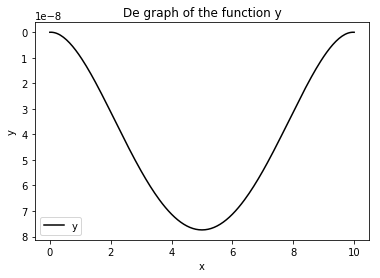

In [72]:
N = 199
x,y = main(N)
plot(x,y)
#table(x,y,len(y)-2)

In [54]:
print((0.90/0.05).is_integer())

False
